In [46]:
import numpy as np
import dicom
import nibabel as nib
import nibabel
import six
np.set_printoptions(precision=4, suppress=True)

In [21]:
slicePath = "C:/Users/chensj/Desktop/ITKSNP/1/baoyongyao.nii"
contourPath = "C:/Users/chensj/Desktop/ITKSNP/1/Untitled.nii"

# loading the NIfTI1 image & annotation
ni_slice  = nib.load(slicePath)
ni_contour  = nib.load(contourPath)
affine=ni_slice.affine

data = np.array(ni_slice.get_data()).reshape(512,512).transpose()
contour=np.array(ni_contour.get_data()).reshape(512,512).transpose()

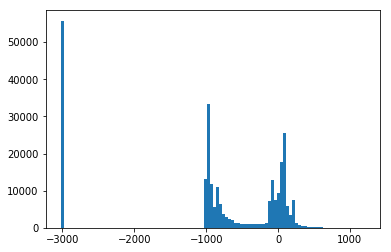

In [22]:
from matplotlib import pyplot
vals=data.reshape(512*512)
pyplot.hist(vals,bins=100)
pyplot.show()

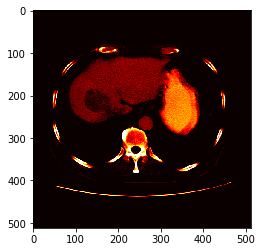

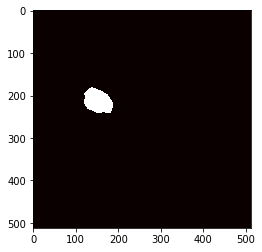

In [23]:
def showSlice(slice, level =200, window=300, hist=False):
    minwin = level - window/2.0
    maxwin = level + window/2.0
    import copy
    data = copy.deepcopy(slice)
    data[data<=minwin] = minwin
    data[data>=maxwin] = maxwin

    from matplotlib import pyplot
    if hist:
        vals=data.reshape(512*512)
        pyplot.hist(vals,bins=100)
        pyplot.show()

    pyplot.imshow(data, cmap=pyplot.cm.hot)
    pyplot.show()

    pyplot.imshow(contour, cmap=pyplot.cm.hot)
    pyplot.show()
    
showSlice(slice=data)

In [24]:
contour

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [12]:
from radiomics import featureextractor        
extractor = featureextractor.RadiomicsFeaturesExtractor()
result = extractor.execute(data, contour)
fv = result.values()


Error reading image Filepath or SimpleITK object


In [ ]:
origin = patient.origin
spacing = patient.spacing
img = sitk.GetImageFromArray(img_array)
img.SetOrigin(origin)
img.SetSpacing(spacing)

In [41]:
import SimpleITK as sitk
sitk_data    = sitk.GetImageFromArray(data.reshape(512,512,1))
sitk_contour = sitk.GetImageFromArray(contour.reshape(512,512,1))

In [49]:
from radiomics import featureextractor        
extractor = featureextractor.RadiomicsFeaturesExtractor()
extractor.enableAllImageTypes()
extractor.enableAllFeatures()
result = extractor.execute(sitk_data, sitk_contour)
i=0
for key, val in six.iteritems(result):
  print("\t%d\t%s: %s" %(i,key, val))
  i+=1

C:\Users\chensj\AppData\Local\conda\conda\envs\segmentation\lib\site-packages\pyradiomics-0+unknown-py3.5-win-amd64.egg\radiomics\ngtdm.py:235: RuntimeWarning: invalid value encountered in double_scalars
  contrast = (numpy.sum(p_i[:, None] * p_i[None, :] * (i[:, None] - i[None, :]) ** 2) / (Ngp * (Ngp - 1))) * \
Image too small to apply LoG filter, size: [  1 512 512]


	0	general_info_BoundingBox: (0, 119, 182, 1, 69, 61)
	1	general_info_EnabledImageTypes: {'Wavelet': {}, 'Exponential': {}, 'Original': {}, 'Square': {}, 'LoG': {}, 'SquareRoot': {}, 'Logarithm': {}}
	2	general_info_GeneralSettings: {'interpolator': 'sitkBSpline', 'force2Ddimension': 0, 'distances': [1], 'padDistance': 5, 'resegmentRange': None, 'resampledPixelSpacing': None, 'minimumROIDimensions': 1, 'label': 1, 'enableCExtensions': True, 'removeOutliers': None, 'additionalInfo': True, 'normalizeScale': 1, 'force2D': False, 'minimumROISize': None, 'normalize': False}
	3	general_info_ImageHash: aa9426be3c652562b6fbe5275f3aa3006c923dd7
	4	general_info_ImageSpacing: (1.0, 1.0, 1.0)
	5	general_info_MaskHash: 1dbc2edad140f828092174ed457b26148cfb60d3
	6	general_info_Version: 0+unknown
	7	general_info_VolumeNum: 1
	8	general_info_VoxelNum: 3089
	9	original_shape_SphericalDisproportion: 6.12333789018
	10	original_shape_MinorAxis: 52.7979716493
	11	original_shape_SurfaceArea: 6280.83842751506

In [50]:
import numpy as numpy
import nibabel as nib
import dicom
import six
import SimpleITK as sitk
from radiomics import featureextractor

def NiFeatureExtractor(slicePath, contourPath):
	# loading the NIfTI1 image & annotation
	ni_slice   = nib.load(slicePath)
	ni_contour = nib.load(contourPath)
	data       = np.array(ni_slice.get_data()).reshape(512,512).transpose()
	contour    = np.array(ni_contour.get_data()).reshape(512,512).transpose()
	sitk_data    = sitk.GetImageFromArray(data.reshape(512,512,1))
	sitk_contour = sitk.GetImageFromArray(contour.reshape(512,512,1))

	extractor = featureextractor.RadiomicsFeaturesExtractor()
	extractor.enableAllImageTypes()
	extractor.enableAllFeatures()
	result = extractor.execute(sitk_data, sitk_contour)
	return result

In [52]:
slicePath = "C:/Users/chensj/Desktop/ITKSNP/1/baoyongyao.nii"
contourPath = "C:/Users/chensj/Desktop/ITKSNP/1/Untitled.nii"
result=NiFeatureExtractor(slicePath=slicePath,contourPath=contourPath)

C:\Users\chensj\AppData\Local\conda\conda\envs\segmentation\lib\site-packages\pyradiomics-0+unknown-py3.5-win-amd64.egg\radiomics\ngtdm.py:235: RuntimeWarning: invalid value encountered in double_scalars
  contrast = (numpy.sum(p_i[:, None] * p_i[None, :] * (i[:, None] - i[None, :]) ** 2) / (Ngp * (Ngp - 1))) * \
Image too small to apply LoG filter, size: [  1 512 512]


In [53]:
result

OrderedDict([('general_info_BoundingBox', (0, 119, 182, 1, 69, 61)),
             ('general_info_EnabledImageTypes',
              {'Exponential': {},
               'LoG': {},
               'Logarithm': {},
               'Original': {},
               'Square': {},
               'SquareRoot': {},
               'Wavelet': {}}),
             ('general_info_GeneralSettings',
              {'additionalInfo': True,
               'distances': [1],
               'enableCExtensions': True,
               'force2D': False,
               'force2Ddimension': 0,
               'interpolator': 'sitkBSpline',
               'label': 1,
               'minimumROIDimensions': 1,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'padDistance': 5,
               'removeOutliers': None,
               'resampledPixelSpacing': None,
               'resegmentRange': None}),
             ('general_info_ImageHash',
           

In [55]:
import os
outputFile = input("Please input the output location:")
fp = open(os.path.join(outputFile, "radiomics.tsv"))

cnt =1
for key, val in six.iteritems(result):
    if key.startswith("general"):
        continue
    fp.write("%d\t%s\t%.12f\n"%(cnt, key, val))
    cnt+=1
    
fp.close()

1	original_shape_SphericalDisproportion	6.12333789018
2	original_shape_MinorAxis	52.7979716493
3	original_shape_SurfaceArea	6280.838427515061
4	original_shape_Compactness2	0.00435547299815
5	original_shape_Maximum2DDiameterSlice	68.0
6	original_shape_Sphericity	0.163309622617
7	original_shape_MajorAxis	75.4737151794
8	original_shape_Elongation	0.699554427972
9	original_shape_SurfaceVolumeRatio	2.03329181855
10	original_shape_Maximum2DDiameterRow	76.84399781375251
11	original_shape_Maximum2DDiameterColumn	56.0
12	original_shape_Flatness	0.0
13	original_shape_Maximum3DDiameter	76.84399781375251
14	original_shape_Volume	3089.0
15	original_shape_LeastAxis	0.0
16	original_shape_Compactness1	0.00350119693619
17	wavelet-LHL_firstorder_Skewness	-0.00753691088375
18	wavelet-LHL_firstorder_Entropy	1.01227690873
19	wavelet-LHL_firstorder_Range	53.384839481
20	wavelet-LHL_firstorder_10Percentile	-9.25949229072
21	wavelet-LHL_firstorder_RootMeanSquared	7.47398399096
22	wavelet-LHL_firstorder_TotalE

## 3D情况

In [24]:
import numpy as np
import nibabel as nib
import dicom
import six
import SimpleITK as sitk
from radiomics import featureextractor
slicePath = "C:/Users/chensj/Desktop/ITKSNP/3d/1.nii"
contourPath = "C:/Users/chensj/Desktop/ITKSNP/3d/Untitled.nii"
ni_slice  = nib.load(slicePath)
ni_contour  = nib.load(contourPath)

data = np.array(ni_slice.get_data())
print(ni_slice.header.get_zooms())
print(data.shape)
#data = np.array(ni_slice.get_data()).reshape(512,512).transpose()
#contour=np.array(ni_contour.get_data()).reshape(512,512).transpose()

(0.64648438, 0.64648438, 5.0)
(512, 512, 49)
